In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
f_in = open('countries.tsv', 'r')
f_out = open('countries_clean.tsv', 'w')
f_out.write(f_in.read().replace(',', '.'))
f_in.close()
f_out.close()

In [3]:
data = pd.read_csv('countries_clean.tsv', sep='\t', header=0, index_col=0)
data.head()

1 
 2 
 3 
 4 
 5 
 6 
 7 
 8 
 9 
 10 
 11 
 12 
 
 
 Країна 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 Австралія 
 17800 
 15 
 8 
 7.3 
 1.9 
 16848 
 2.3 
 85 
 100 
 1.38 
 74 
 80 
 
 
 Австрія 
 8000 
 12 
 11 
 6.7 
 1.5 
 18396 
 94.0 
 58 
 99 
 0.20 
 73 
 79 
 
 
 Аргентина 
 33900 
 20 
 9 
 25.6 
 2.8 
 3408 
 12.0 
 86 
 95 
 1.30 
 68 
 75 
 
 
 Бангладеш 
 125000 
 35 
 11 
 106.0 
 4.7 
 202 
 800.0 
 16 
 35 
 2.40 
 53 
 53 
 
 
 Бельгія 
 10100 
 12 
 11 
 7.2 
 1.7 
 17912 
 329.0 
 96 
 99 
 0.20 
 73 
 79

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, Австралія to Японія
Data columns (total 12 columns):
1     52 non-null int64
2     52 non-null int64
3     52 non-null int64
4     52 non-null float64
5     52 non-null float64
6     52 non-null int64
7     52 non-null float64
8     52 non-null int64
9     52 non-null int64
10    52 non-null float64
11    52 non-null int64
12    52 non-null int64
dtypes: float64(4), int64(8)
memory usage: 5.3+ KB


In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
data_std = scaler.transform(data)

In [6]:
data_std[:10]

array([[-0.31376135, -0.62898722, -0.27118946, -0.76340453, -0.60000748,
         1.10768523, -0.32165659,  1.00692961,  0.77272626,  0.07345823,
         0.80587611,  0.73639496],
       [-0.36196068, -0.9272304 ,  0.64849653, -0.78256626, -0.85727723,
         1.31118359, -0.22508265, -0.15855198,  0.72360429, -1.06190627,
         0.68226089,  0.62822395],
       [-0.23457674, -0.13191525,  0.03537254, -0.17897178, -0.02115054,
        -0.65912222, -0.31144103,  1.05009559,  0.52711644, -0.00351563,
         0.06418482,  0.1955399 ],
       [ 0.21348027,  1.35930064,  0.64849653,  2.38869996,  1.20088077,
        -1.08057942,  0.51844189, -1.97152335, -2.42020131,  1.054875  ,
        -1.79004338, -2.18422233],
       [-0.35163225, -0.9272304 ,  0.64849653, -0.76659815, -0.72864236,
         1.24755749,  0.02240781,  1.48175544,  0.72360429, -1.06190627,
         0.68226089,  0.62822395],
       [-0.35064859, -0.827816  ,  0.64849653, -0.3897508 , -0.61287097,
        -0.25265134, -

In [7]:
from scipy.spatial.distance import pdist, squareform
d = squareform(pdist(data_std))

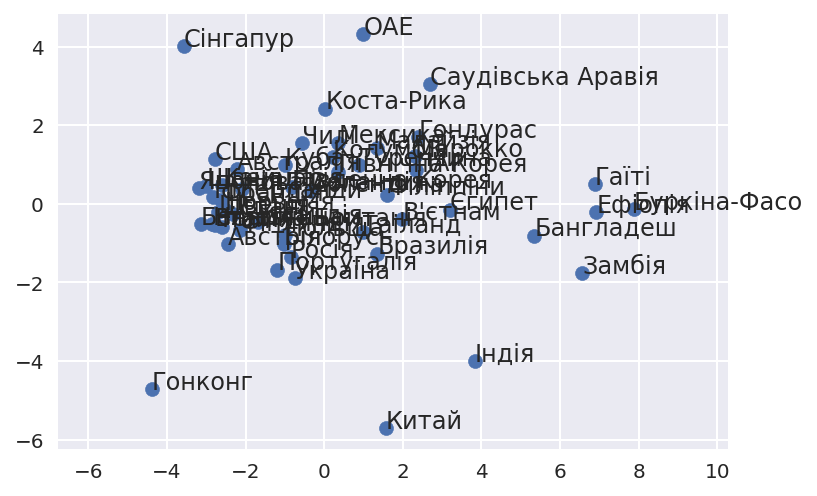

In [8]:
from sklearn.manifold import MDS
model = MDS(n_components=2, dissimilarity='precomputed')
out = model.fit_transform(d)

fig, ax = plt.subplots()
x = out[:, 0]
y = out[:, 1]
ax.scatter(x, y)

for i, txt in enumerate(data.index):
    ax.annotate(txt, (x[i], y[i]))
plt.axis('equal');